In [11]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from einops import rearrange
import re

In [12]:
root_path = Path.cwd()
pic_path = root_path / "tear_data/" / "neg"
pic_list = [path for path in pic_path.iterdir() if path.name[-3:] == "png"]

In [13]:
def plot_features(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    fig, axes = plt.subplots(1,4,figsize = (256, 64))

    axes[0].imshow(img, cmap='Greys_r')
    axes[1].imshow(cv2.Sobel(img,-1,1,0), cmap='Greys_r')
    axes[2].imshow(cv2.Sobel(img,-1,0,1), cmap='Greys_r')
    
    _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
    axes[3].imshow(thresh, cmap='Greys_r')

In [14]:
def plot_nicefeatures(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    i
    img = (cv2.Sobel(img,-1,0,1) + cv2.Sobel(img,-1,1,0))/2
    #_, img = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)
    plt.imshow(img, cmap='Greys_r')

In [15]:
def filter_img(path):
    img = np.array(Image.open(path))
    img = img[img.sum(axis=1) > 100000,:]
    img = img[:,img.sum(axis=0) > 100000,]
    
    H, W = img.shape
    
    h, w = H//12, W//6
    
    img = np.array(Image.fromarray(img).resize((w*6, h*12), Image.Resampling.LANCZOS))
    img_p = rearrange(img, "(b1 h) (b2 w) -> (b1 b2) (h w)", b1=12, b2=6)
    
    img_p = img_p / np.array([img_p.mean(axis=1)]*h*w).T * img_p.mean()
    
    return rearrange(img_p, "(b1 b2) (h w) -> (b1 h) (b2 w)", b1=12, b2=6, h=h, w=w).astype('uint8')

def adapt_threshold(input_img, ratio):
    
    input_img= cv2.blur(input_img, (5,5))
    
    m = 100
    _, img = cv2.threshold(input_img, ratio, 255, cv2.THRESH_BINARY)
    for gg in range(m):
        flag = 0
        for i in input_img:
            s = ''.join(str(list(i.astype(int))).strip('[]').split(', '))
            if len(re.findall('0255255255', s)) > 3:
                ratio -= 1
                _, img = cv2.threshold(input_img, ratio, 255, cv2.THRESH_BINARY)
                flag = 1
                break
        if flag == 1:
            continue
        
        tmp = img.T
        for i in tmp:
            s = ''.join(str(list(i.astype(int))).strip('[]').split(', '))
            if len(re.findall('0255255255',s)) > 3:
                ratio -= 1
                _, img = cv2.threshold(input_img, ratio, 255, cv2.THRESH_BINARY)
                flag = 1
                break
        if flag == 1:
            continue
        
        return img, ratio
    return img, ratio

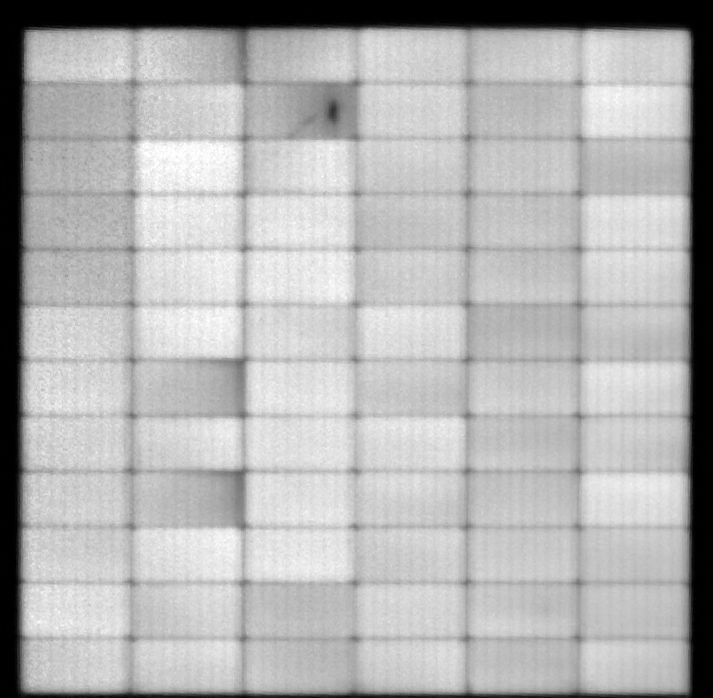

In [16]:
Image.open(pic_list[2])

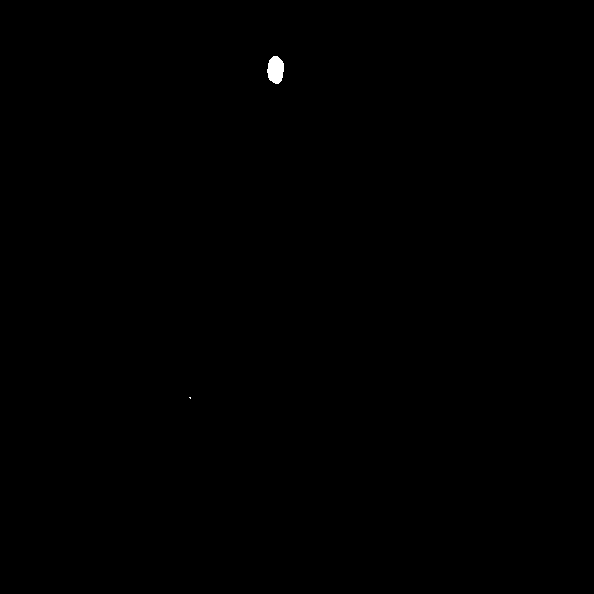

In [17]:
img3 = filter_img(pic_list[2])
a = 1.3
O = img3 * float(a)
O[O > 255] = 255
O = np.round(O)

O = O[O.sum(axis=1) > np.percentile(O.sum(axis=1), 10),:]
O = O[:,O.sum(axis=0) > np.percentile(O.sum(axis=0), 10)]

O, ratio = adapt_threshold(O, 200)

O = (O - 255) * -1

O = O.astype(np.uint8)
Image.fromarray(O)


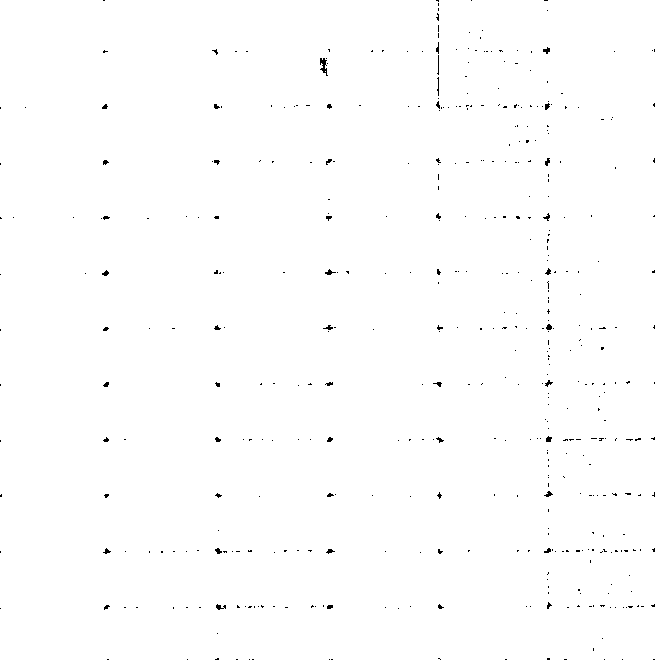

In [162]:
th1 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 21)
Image.fromarray(th1)

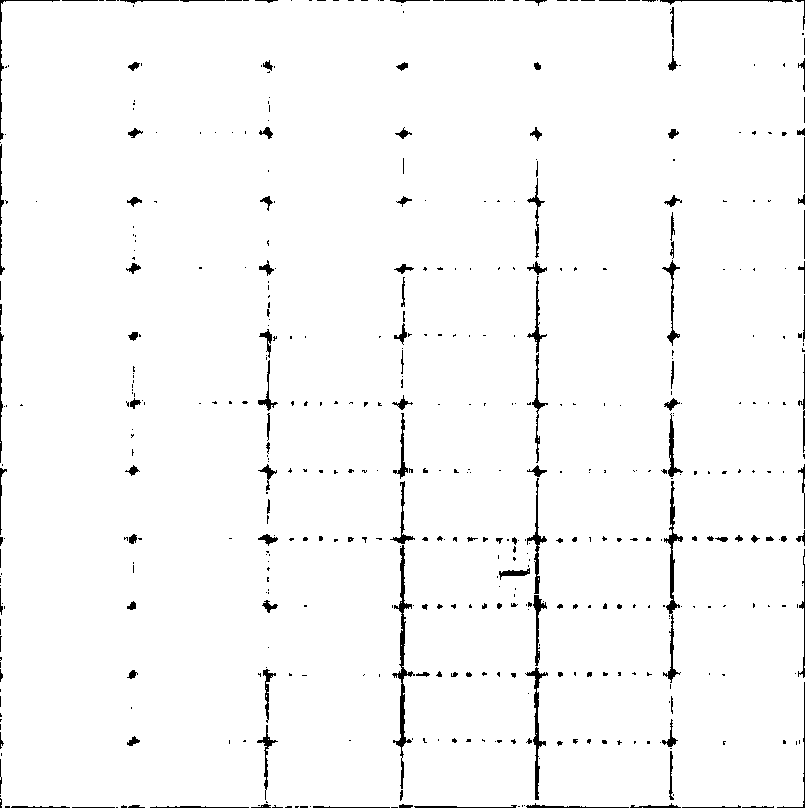

In [333]:
img = np.array(Image.open(pic_list[3]))
img2 = img[img.sum(axis=1) > 100000,:]
img3 = img2[:,img2.sum(axis=0) > 100000,]

a = 1.5
O = img3 * float(a)
O[O > 255] = 255
O = np.round(O)
O = O.astype(np.uint8)

O = cv2.adaptiveThreshold(O,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 8)

Image.fromarray(O)

In [335]:
O.sum(axis=0)

array([ 26265, 143055, 191505, 201195, 203235, 203745, 202725, 204765,
       204765, 205275, 205785, 205530, 205275, 205275, 205275, 205275,
       205275, 205275, 205275, 205275, 205020, 204765, 205020, 205275,
       205275, 205275, 205275, 205275, 205530, 205530, 205530, 205530,
       205530, 205275, 205275, 205530, 205275, 205530, 205530, 205530,
       205275, 205275, 205530, 205530, 205530, 205530, 205530, 205530,
       205530, 205275, 205275, 205275, 205020, 205530, 205530, 205530,
       205530, 205530, 205530, 205530, 205785, 205530, 205275, 205275,
       205275, 205275, 205530, 205530, 205530, 205530, 205785, 205785,
       205530, 205530, 205530, 205530, 205530, 205530, 205530, 205530,
       205530, 205530, 205530, 205530, 205530, 205530, 205530, 205530,
       205530, 205530, 205530, 205530, 205530, 205530, 205530, 205530,
       205530, 205530, 205785, 205530, 205530, 205530, 205530, 205530,
       205785, 205785, 205530, 205530, 205530, 205530, 205530, 205530,
      

In [191]:
img = np.array(Image.open(pic_list[18]))
img = img[img.sum(axis=1) > 100000,:]
img = img[:,img.sum(axis=0) > 100000,]

img.shape

(660, 655)

In [298]:
def filter_img(path, ratio):
    img = np.array(Image.open(path))
    img = img[img.sum(axis=1) > 100000,:]
    img = img[:,img.sum(axis=0) > 100000,]
    
    H, W = img.shape
    
    h, w = H//12, W//6
    
    img = np.array(Image.fromarray(img).resize((w*6, h*12), Image.Resampling.LANCZOS))
    img_p = rearrange(img, "(b1 h) (b2 w) -> (b1 b2) (h w)", b1=12, b2=6)
    
    img_p = img_p / np.array([img_p.mean(axis=1)]*h*w).T * img_p.mean()
    
    return rearrange(img_p, "(b1 b2) (h w) -> (b1 h) (b2 w)", b1=12, b2=6, h=h, w=w).astype('uint8')

In [523]:
a = np.ones((2,3))
b = next(iter(a)).astype(int)
''.join(str(list(b)).strip('[]').split(', '))

'111'

In [652]:
import re

def adapt_threshold(input_img, ratio):
    
    input_img= cv2.blur(input_img, (5,5))
    
    m = 100
    _, img = cv2.threshold(input_img, ratio, 255, cv2.THRESH_BINARY)
    for gg in range(m):
        flag = 0
        for i in input_img:
            s = ''.join(str(list(i.astype(int))).strip('[]').split(', '))
            if len(re.findall('0255255255', s)) > 3:
                ratio -= 1
                _, img = cv2.threshold(input_img, ratio, 255, cv2.THRESH_BINARY)
                flag = 1
                break
        if flag == 1:
            continue
        
        tmp = img.T
        for i in tmp:
            s = ''.join(str(list(i.astype(int))).strip('[]').split(', '))
            if len(re.findall('0255255255',s)) > 3:
                ratio -= 1
                _, img = cv2.threshold(input_img, ratio, 255, cv2.THRESH_BINARY)
                flag = 1
                break
        if flag == 1:
            continue
        
        return img, ratio
    return img, ratio

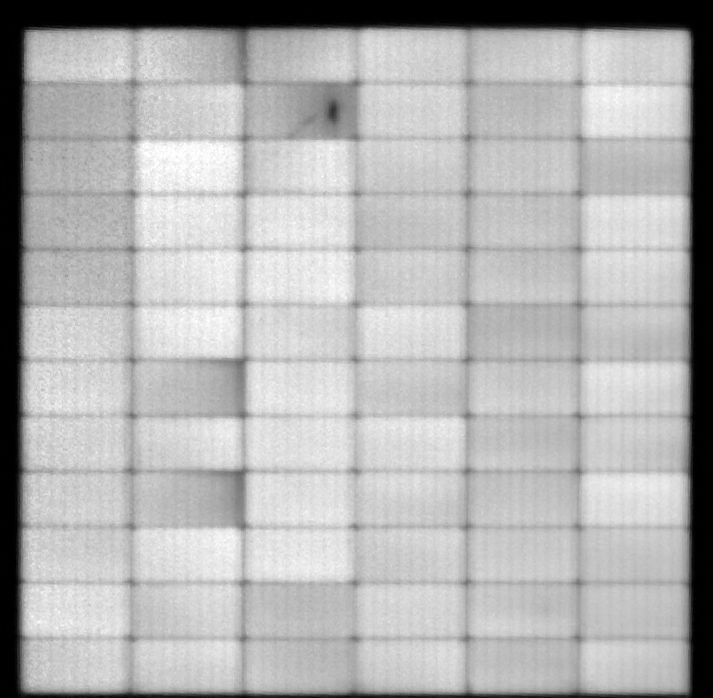

In [653]:
Image.open(pic_list[2])

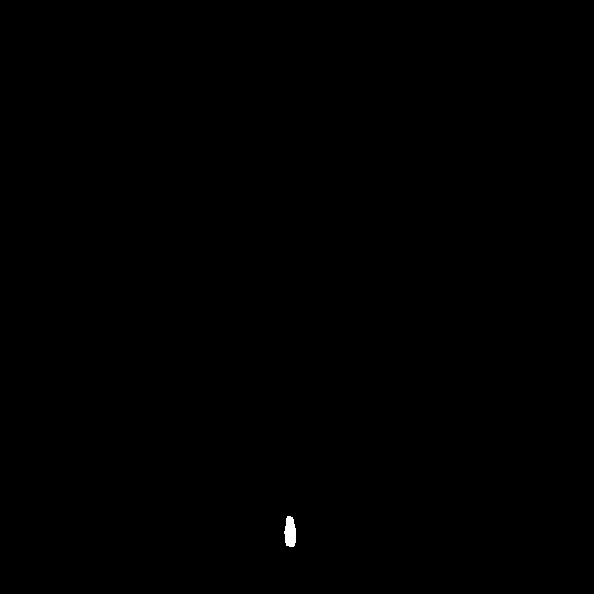

In [665]:
img3 = filter_img(pic_list[10])
a = 1.3
O = img3 * float(a)
O[O > 255] = 255
O = np.round(O)

O = O[O.sum(axis=1) > np.percentile(O.sum(axis=1), 10),:]
O = O[:,O.sum(axis=0) > np.percentile(O.sum(axis=0), 10)]

O, ratio = adapt_threshold(O, 200)

O = (O - 255) * -1

O = O.astype(np.uint8)
Image.fromarray(O)

